# *Customer churn prediction for telecom companies*

Submitted by: Neha Ingavale

Registeration number: 2211488

### 1. Introduction

This report aims to address the issue of customer churn in the telecom industry by analyzing and developing strategies to minimize it. Customer churn refers to customers discontinuing their business with a specific firm or service. In the highly competitive telecommunications market, the annual churn rate typically falls between 15% and 25%.

Retaining customers poses a significant challenge for telecom companies due to their large customer base and limited resources for personalized retention efforts. However, by accurately predicting which customers are likely to churn in advance, companies can focus their retention strategies on these "high-risk" customers, ultimately reducing churn and fostering greater customer loyalty.

The main objective of this project is to gain insights into customer churn and devise effective strategies to mitigate it within the telecom industry. By analyzing customer data, including variables such as gender, type of service, and profitability, we aim to uncover patterns and trends that can facilitate the prediction of churn and inform the implementation of targeted retention measures.

#### 1.1 Data Preparation

In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import missingno as msno # For visualizing missing data
import matplotlib.pyplot as plt # For creating visualizations
import seaborn as sns # For advanced visualizations
import plotly.express as px # For interactive visualizations
import plotly.graph_objects as go # For creating customized plots
from plotly.subplots import make_subplots # For creating subplots
import warnings
warnings.filterwarnings('ignore') # For suppressing warnings
from sklearn.metrics import classification_report
from sklearn import metrics

In [90]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 70.9/70.9 MB 3.7 MB/s eta 0:00:00


In [4]:
# Importing necessary libraries for data preprocessing and model building
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importing different classification algorithms from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# Importing functions and classes for model evaluation and performance metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


### 2. Dataset

The dataset used in this project consists of 7,043 rows and 21 columns. The columns include customer attributes such as gender, senior citizen status, partner and dependents, tenure, phone service, internet service, online security, and payment method. The 'Churn' column indicates whether a customer has churned.

In [5]:
df = pd.read_csv('C:/Users/Neha/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 3. Preliminary analysis

#### 3.1 Misisng values

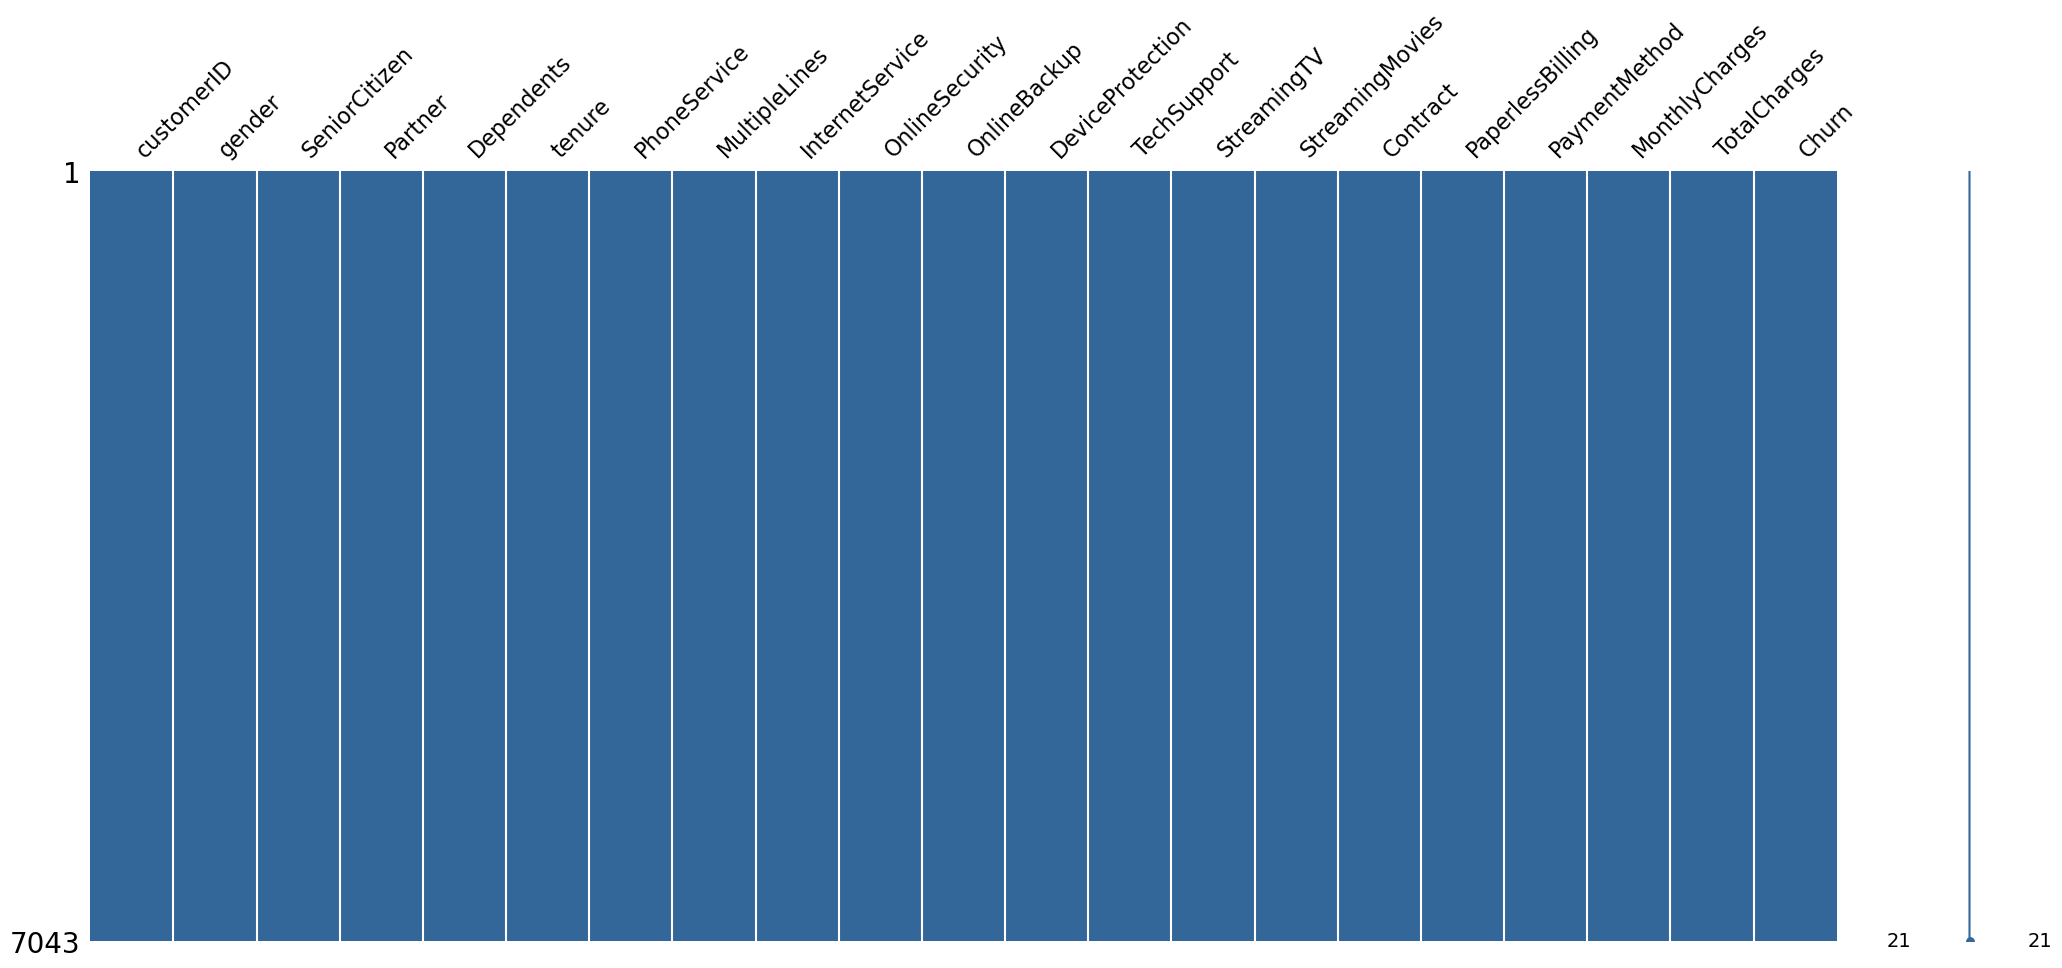

In [6]:
# Visualize missing values as a matrix
msno.matrix(df, color=(0.2, 0.4, 0.6));

The missing values matrix indicates that there are no missing values in the dataset. Therefore, there is no specific pattern of missingness to observe. The dataset is complete, allowing for a comprehensive analysis of the relationships between variables.

In [7]:
# Replace blank spaces with NaN
df.replace(' ', np.nan, inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Upon conducting a thorough analysis, we can identify certain instances of indirect missingness in our data, which may manifest as blank spaces or incomplete information.

In [8]:
# Identify Missing Total Charges
missing_total_charges = df[df['TotalCharges'].isnull()]
print(missing_total_charges)# Print the rows where Total Charges is missing or null

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
Let's see if there are any other 0 values in the tenure column.

In [9]:
#Identify Customers with Tenure Zero
df[df['tenure'] == 0].index # Get the index of customers with tenure zero

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [10]:
#Remove Customers with Tenure Zero
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True) # Remove customers with tenure zero
df[df['tenure'] == 0].index # Verify that there are no more customers with tenure zero

Int64Index([], dtype='int64')

In [11]:
df.isnull().sum() # Count the number of missing values in each column of the DataFrame

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 3.2 Data Manipulation

In [12]:
df = df.drop(['customerID'], axis = 1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

The 'customerID' is unique Identifier column serveing as a unique identifier for each customer and does not provide any meaningful information for your analysis, dropping it can simplify dataset without losing any valuable insights. Also, the 'customerID' column does not contribute to the analysis so removing it can make DataFrame more focused and easier to work with.

In [13]:
# Map SeniorCitizen values
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"}) # Map 0 to "No" and 1 to "Yes" in the SeniorCitizen column
df.head() # Display the first few rows of the DataFrame

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [81]:
# Descriptive statistics for InternetService column
df["InternetService"].describe(include=['object', 'bool'])
# This code provides descriptive statistics for the InternetService column, including counts,
# unique values, top value, and frequency. The 'include' parameter is set to include both object and boolean data types.

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [14]:
# Convert numerical columns to numeric data type
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df[numerical_cols].describe()
# This code converts the columns 'tenure', 'MonthlyCharges', and 'TotalCharges' to numeric data type using the pd.to_numeric() function.
# The 'errors' parameter is set to 'coerce', which converts any non-numeric values to NaN.
# The describe() function is then used to generate descriptive statistics for the converted numerical columns.

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

In [15]:
# Create subplots: use 'domain' type for Pie subplot
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']

# Create a figure with two pie subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add pie chart for gender distribution
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender",
marker=dict(colors=['#FF6F00', '#FFD600'])),
1, 1)

# Add pie chart for churn distribution
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn",
marker=dict(colors=['#00C853', '#D50000'])),
1, 2)

# Customize the pie charts
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

# Set the layout of the figure
fig.update_layout(
title_text="Gender and Churn Distributions",
# Add annotations in the center of the donut pies
annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=12, showarrow=False),
dict(text='Churn', x=0.84, y=0.5, font_size=12, showarrow=False)])
fig.update_layout(width=700, height=500)
# Display the figure
fig.show()


Approximately 26.6% of the customers in our dataset decided to switch to another firm. Among the customers, 49.5% are female, while 50.5% are male.

In [16]:
# Count the number of non-churned customers by gender
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [85]:
# Count the number of churned customers based on gender
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

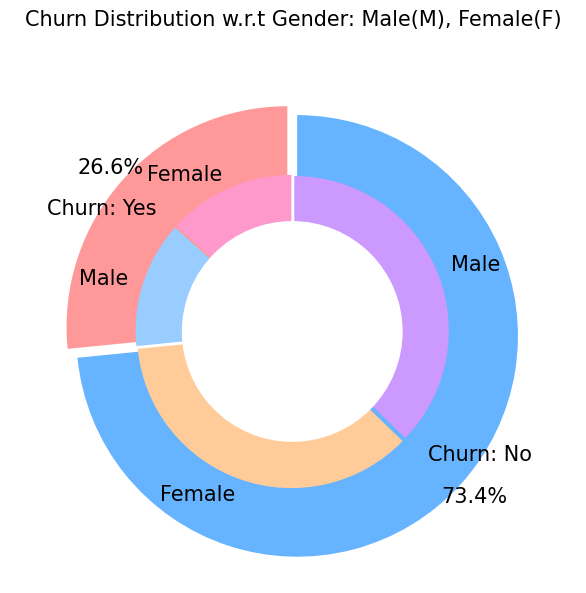

In [17]:

plt.figure(figsize=(6, 6))
churn_labels = ["Churn: Yes", "Churn: No"]
churn_values = [1869, 5163]
gender_labels = ["Female", "Male", "Female", "Male"]
gender_sizes = [939, 930, 2544, 2619]
churn_colors = ['#ff9999', '#66b3ff']  # Custom colors for churn: "Yes" and "No"
gender_colors = ['#ff99cc', '#99ccff', '#ffcc99', '#cc99ff']  # Custom colors for gender: Female and Male
churn_explode = (0.3, 0.3)
gender_explode = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}

# Plot
plt.pie(churn_values, labels=churn_labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8,
        colors=churn_colors, startangle=90, frame=True, explode=churn_explode, radius=10, textprops=textprops,
        counterclock=True)
plt.pie(gender_sizes, labels=gender_labels, colors=gender_colors, startangle=90,
        explode=gender_explode, radius=7, textprops=textprops, counterclock=True)

# Draw circle
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# Show plot
plt.axis('equal')
plt.tight_layout()
plt.show()


The churn behavior is relatively similar between genders, with a negligible difference in the percentage or count of customers who changed their service provider. Both male and female customers exhibit a similar pattern when it comes to migrating to another service provider or firm.

In [18]:
# Define color mapping for contract types
color_map = {"Month-to-month": "blue", "One year": "green", "Two year": "orange"}

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>",
                   color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* The majority of customers with a "Month-to-month" contract have churned, representing approximately 75% of the customers in that contract category.
* Customers with a "One year" contract have a lower churn rate, accounting for around 13% of the customers in that category.
* Customers with a "Two year" contract have the lowest churn rate, with only about 3% of customers churning.

In [20]:
payment_labels = df['PaymentMethod'].unique()
payment_values = df['PaymentMethod'].value_counts()

colors = ['#FFA07A', '#87CEEB', '#90EE90', '#FFD700']  # Specify custom colors for the pie chart

fig = go.Figure(data=[go.Pie(labels=payment_labels, values=payment_values, hole=.3)])
fig.update_traces(marker=dict(colors=colors))  # Apply custom colors to the pie chart slices
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.update_layout(width=500, height=400)
fig.show()


The payment method distribution shows that the most common payment method among customers is "Electronic check" with a count of 2365. The next most common methods are "Mailed check" with 1604, "Bank transfer (automatic)" with 1542, and "Credit card (automatic)" with 1521.

In [22]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=500, height=400, bargap=0.1)
fig.show()

Customers who had chosen the "Electronic Check" payment method were the most likely to churn or move out. On the other hand, customers who used "Credit Card (automatic)", "Bank transfer (automatic)", or "Mailed check" as their payment methods were less likely to churn. This suggests that customers who opted for more stable and automated payment methods were more likely to stay with the service provider, while those using electronic checks had a higher tendency to switch.

In [26]:
# Get unique values of the "InternetService" column
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [27]:
# Count the occurrences of unique combinations of "InternetService" and "Churn" for male customers
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

For male customers, the distribution of Internet Service and Churn status is as follows:

* Among male customers with DSL Internet Service, 992 did not churn (No) and 240 churned (Yes).
* Among male customers with Fiber optic Internet Service, 910 did not churn (No) and 633 churned (Yes).
* Among male customers with no Internet Service, 717 did not churn (No) and 57 churned (Yes)

In [28]:
# Count the occurrences of unique combinations of "InternetService" and "Churn" for female customers
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

For female customers, the distribution of Internet Service and Churn status is as follows:

* Among female customers with DSL Internet Service, 965 did not churn (No) and 219 churned (Yes).
* Among female customers with Fiber optic Internet Service, 889 did not churn (No) and 664 churned (Yes).
* Among female customers with no Internet Service, 690 did not churn (No) and 56 churned (Yes).

In [23]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['No Churn', 'No Churn', 'Churn', 'Churn'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
  marker_color=['#66b3ff', '#66b3ff', '#ff6666', '#ff6666'],
))

fig.add_trace(go.Bar(
  x = [['No Churn', 'No Churn', 'Churn', 'Churn'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
  marker_color=['#c2c2f0', '#c2c2f0', '#ffb3e6', '#ffb3e6'],
))

fig.add_trace(go.Bar(
  x = [['No Churn', 'No Churn', 'Churn', 'Churn'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
  marker_color=['#b3ffb3', '#b3ffb3', '#ff9999', '#ff9999'],
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")
fig.update_layout(width=700, height=500)
fig.show()


Many customers opt for the Fiber optic service, but it is notable that these customers have a higher churn rate. This could indicate dissatisfaction with this particular type of internet service. On the other hand, customers with DSL service form the majority and have a lower churn rate compared to Fiber optic service.

In [24]:
color_map1 = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig2 = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map1)
fig2.update_layout(width=700, height=500, bargap=0.1)
fig2.show()

Customers who do not have dependents are more inclined to churn.

In [25]:
color_map1 = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>", color_discrete_map=color_map1)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers who do not have partners are more prone to churning, indicating a higher likelihood of discontinuing their services.

In [26]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.pie(df, names="SeniorCitizen", color="Churn", title="<b>Churn Distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_traces(hole=0.3, hoverinfo="label+percent+name", textfont_size=16)
fig.update_layout(width=500, height=400)
fig.show()


The proportion of senior citizens in the customer base is relatively small.
A significant number of senior citizens tend to churn.

In [27]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t. Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


The majority of customers who do not have online security tend to churn.

In [28]:
color_map = {"Yes": '#FFA15A', "No": '#FFD700'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling", title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers who opt for paperless billing are more prone to churn.

In [29]:
color_map = {"Yes": '#AB63FA', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="TechSupport", barmode="group", title="<b>Churn distribution w.r.t. Tech Support</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers who do not have Tech Support are more likely to switch to another service provider.

In [30]:
color_map = {"Yes": '#FFA15A', "No": '#FF6666'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

A small percentage of customers do not have a phone service, and among those customers, around one-third of them are more likely to churn.

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

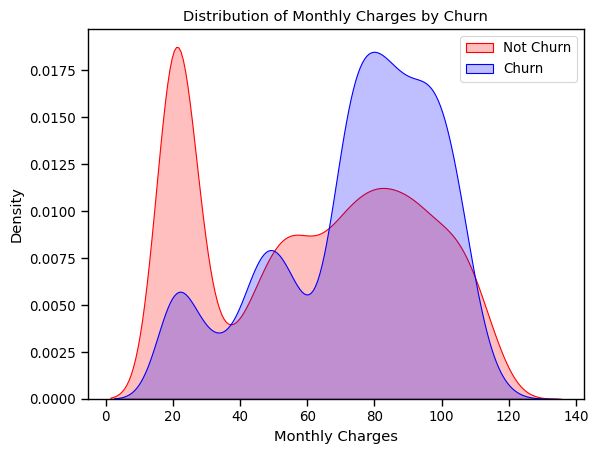

In [31]:
sns.set_context("paper", font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], color="#FF0000", shade=True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], ax=ax, color="#0000FF", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

The analysis reveals that customers with higher monthly charges are more prone to churn.

Text(0.5, 1.0, 'Distribution of total charges by churn')

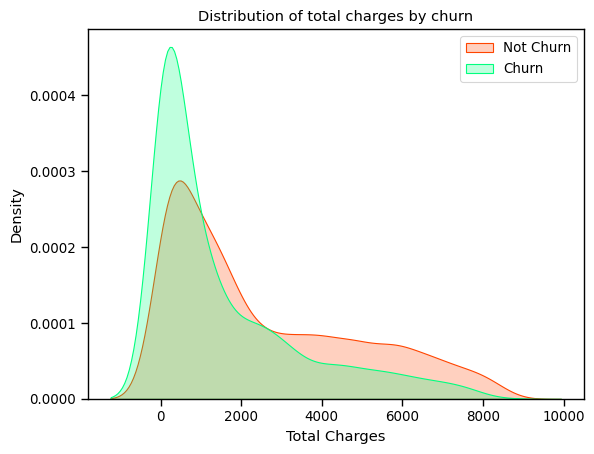

In [32]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ], color="#FF4500", shade=True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ], ax=ax, color="#00FF7F", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')


In [33]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)
fig.update_layout(width=500, height=400)
fig.show()

Customers who have recently joined are more prone to churning.

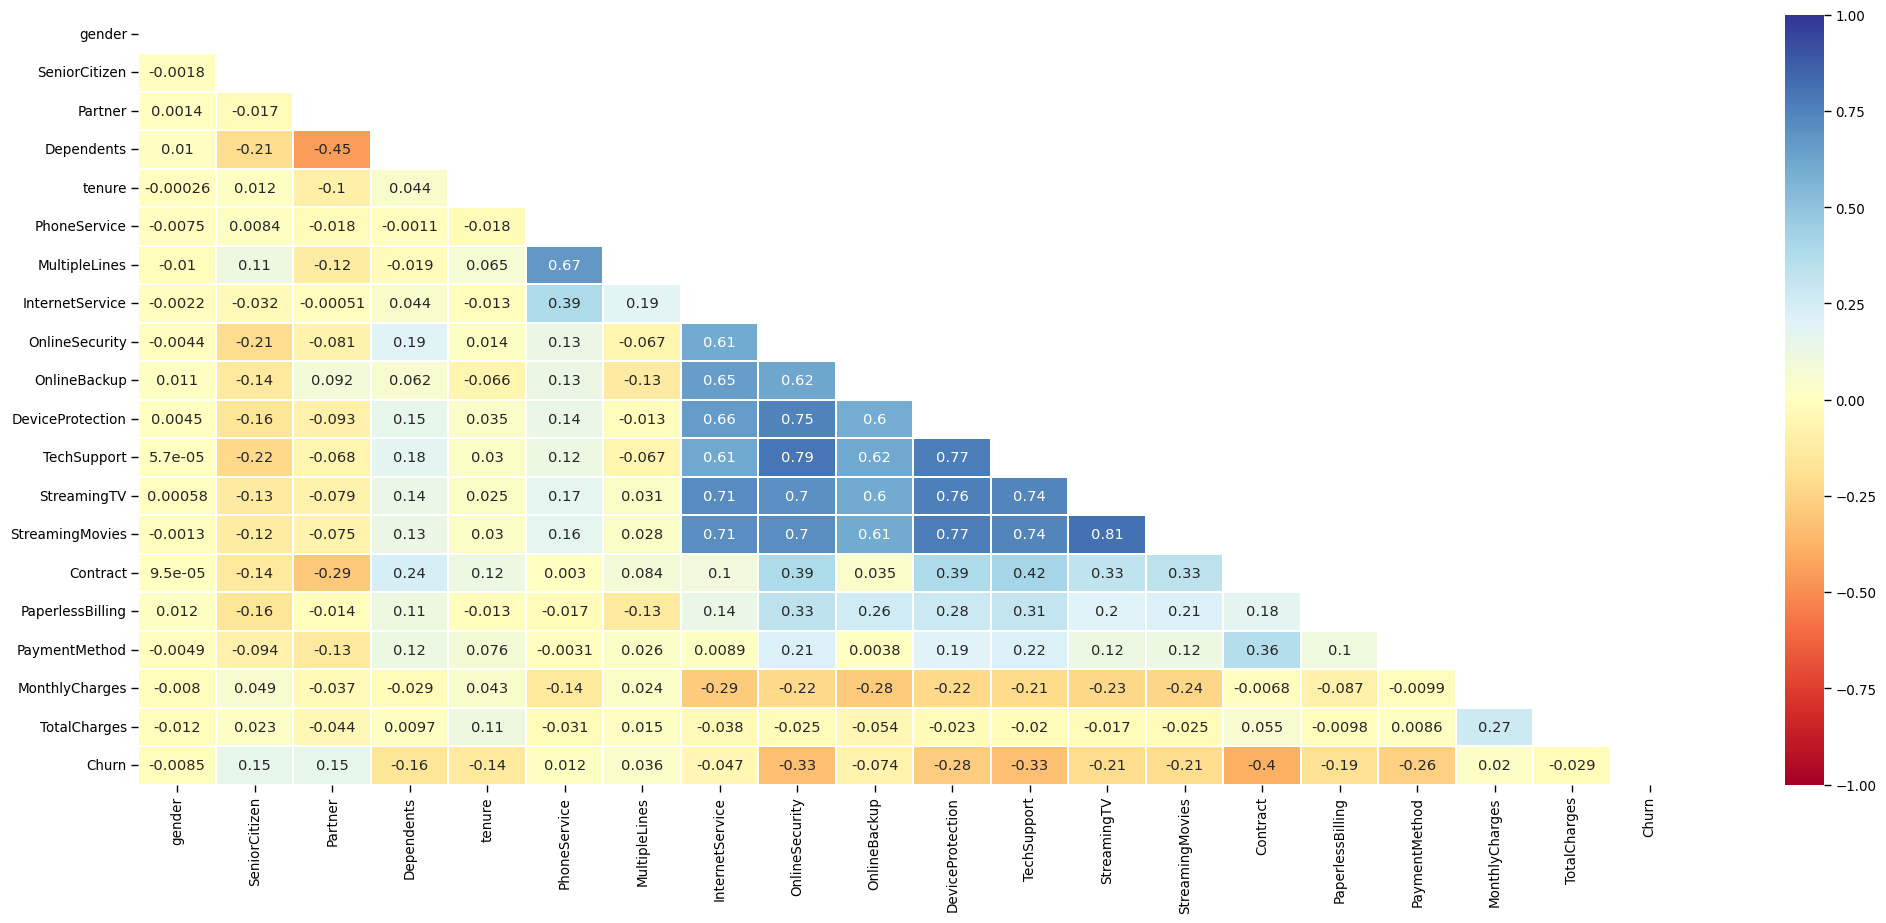

In [34]:
plt.figure(figsize=(25, 10))

correlation = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))

ax = sns.heatmap(correlation, mask=mask, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, linewidths=.2, cmap='RdYlBu', vmin=-1, vmax=1)


Tenure and TotalCharges have a strong positive correlation of 0.92, indicating that as the tenure of a customer increases, their total charges also tend to increase. This suggests that customers who stay with the company for a longer time tend to accumulate higher charges.
MonthlyCharges and TotalCharges have a moderate positive correlation of 0.27. This indicates that customers with higher monthly charges also tend to have higher total charges. It suggests that the monthly charges contribute to the overall accumulation of charges.
Churn, the target variable indicating whether a customer churned or not, shows weak positive correlations with SeniorCitizen (0.15) and MonthlyCharges (0.01). This suggests that there is a slight tendency for senior citizens and customers with higher monthly charges to churn more frequently. However, these correlations are relatively weak, indicating that other factors may have a stronger influence on churn.
Partner and Dependents have negative correlations with Churn (-0.15 and -0.16, respectively). This implies that customers who have a partner or dependents are less likely to churn. Having a stable family structure might contribute to higher customer loyalty.
InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and Contract variables show positive correlations with each other. This indicates that customers who have internet services are more likely to have additional features such as online security, backup, device protection, tech support, and streaming services. Moreover, customers with longer contract durations tend to have more of these additional services.
SeniorCitizen and Dependents have a negative correlation (-0.21), suggesting that older customers are less likely to have dependents. This aligns with the general life stage where older individuals are more likely to have grown-up children who are no longer dependents.
TotalCharges has a strong positive correlation (0.92) with customerID. This correlation might be due to the fact that customers who have been with the company for a longer time tend to have higher total charges, and their customerID values would be higher as well.

####  3.3 Data Preprocessing

Splitting the data into train and test sets

The code is converting object-type columns in a DataFrame to integer using LabelEncoder.

In [35]:
# Import the required library
from sklearn.preprocessing import LabelEncoder

# Define a function to convert object-type columns to integer values
def object_to_int_func(dataframe_series):
    # Check if the column is of object type
    if dataframe_series.dtype == 'object':
        # Use LabelEncoder to transform the values into integers
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

# Apply the object_to_int_func function to all columns in the DataFrame using the apply() method
df = df.apply(lambda x: object_to_int_func(x))

# Display the updated DataFrame with converted integer values
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [42]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

The code calculates the correlation of each column in the DataFrame df with the 'Churn' column and sorts the correlation values in descending order.

In [36]:
# Splitting the DataFrame into input features (X) and target variable (y)
X = df.drop(columns=['Churn'])  # X contains all columns except 'Churn'
y = df['Churn'].values  # y contains the values from the 'Churn' column

# This code sets up the data for a typical machine learning task, where X represents
# the input features and y represents the target variable or labels.
# The 'Churn' column is dropped from X to exclude it from the input features.
# Instead, the 'Churn' column values are assigned to y as the target variable.

# Further steps can be taken using X and y, such as preprocessing, model training,
# and evaluation.


In [44]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)


Parameters:
X: The input features (independent variables) for the model.
y: The target variable (dependent variable) for the model.
test_size: The proportion of the data that should be allocated to the test set. Here, it is set to 0.30, indicating that
            30% of the data will be used for testing and 70% for training.
The resulting X_train, X_test, y_train, and y_test can be used for further model training and evaluation.

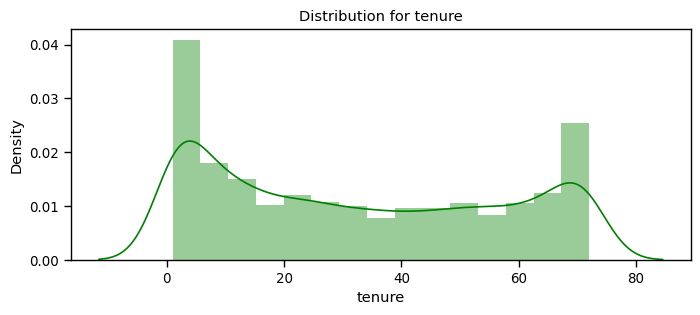

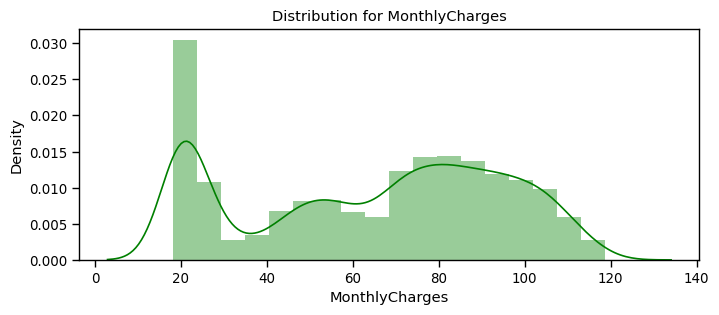

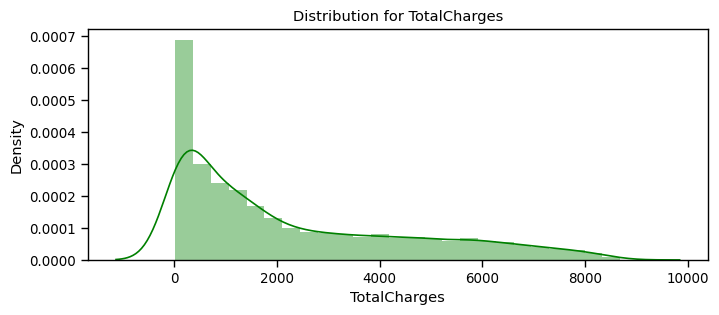

In [37]:
def distplot(feature, frame, color='b'):
     plt.figure(figsize=(8, 3))
     plt.title("Distribution for {}".format(feature))
     ax = sns.distplot(frame[feature], color=color)

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
  distplot(feat, df, color='g')




The purpose of the code is to plot the distribution of numerical features (tenure, MonthlyCharges, TotalCharges) in the given dataframe (df). To ensure consistency among numerical features that have different value ranges, a standard scalar will be applied to scale them down. This process helps in comparing and analyzing the features effectively.

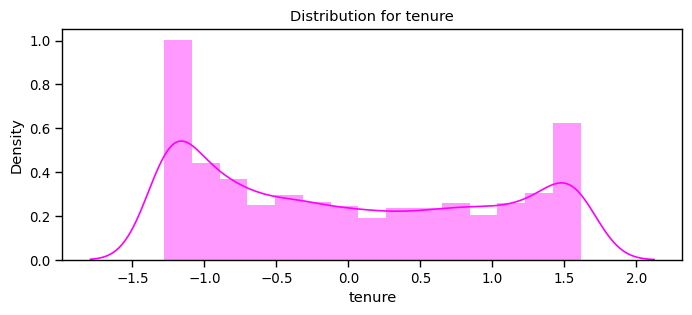

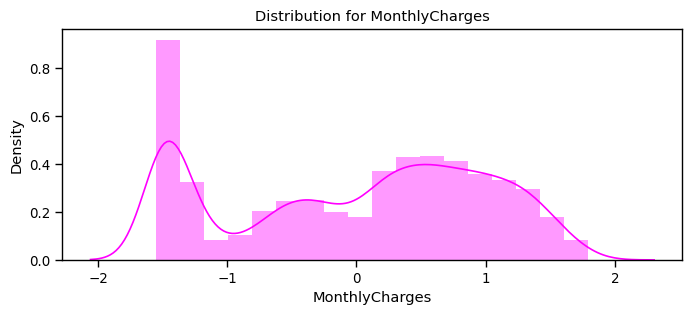

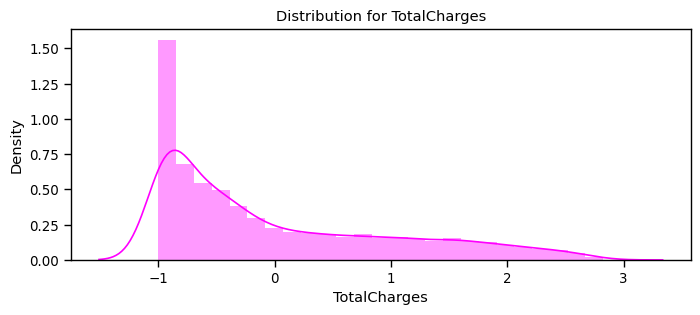

In [46]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns=num_cols)
for feat in numerical_cols:
  distplot(feat, df_std, color='magenta')

In [47]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Variable categorization:

cat_cols_ohe is a list of categorical variables that require one-hot encoding. These variables are 'PaymentMethod', 'Contract', and 'InternetService'.
cat_cols_le is a list of categorical variables that require label encoding. These variables are determined by excluding the numerical columns (num_cols) and the one-hot encoding variables from the set of all columns in the training dataset (X_train).

### 4. Methods

#### 4.1 Machine Learning Model Evaluations and Predictions

##### KNN

In [48]:
#KNN

knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7753554502369668


In [49]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



The n_neighbors parameter in the K-Nearest Neighbors (KNN) algorithm determines the number of neighbors considered when making predictions.
Choosing an appropriate value for n_neighbors is important as it affects the model's performance. A small n_neighbors value can lead to overfitting, where the model becomes too sensitive to noisy data. On the other hand, a large n_neighbors value can result in underfitting, where the model may not capture the underlying patterns effectively.

##### SVC

In [50]:
#SVC

svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [51]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



The relatively high precision for class 0 indicates that the model is good at identifying non-churned customers. However, the lower precision for class 1 suggests that the model has more difficulty correctly predicting churned customers. The low recall for class 1 indicates that the model is missing a significant number of actual churned instances. Overall, the model's performance could be further improved, especially in terms of recall for churned customers.

##### Random Forest

In [52]:
#Random Forest

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy with Random forest algo is:',accuracy_rf)
print(classification_report(y_test, prediction_test))

Accuracy with Random forest algo is: 0.8137440758293839
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



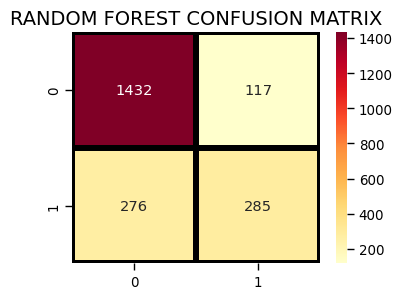

In [53]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 3))
confusion = confusion_matrix(y_test, prediction_test)
sns.heatmap(confusion, annot=True, fmt="d", linecolor="k", linewidths=3, cmap="YlOrRd")
#confusion
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()

The Random Forest model achieved an accuracy of 0.81 in predicting customer churn. The precision for class 0 (not churned) was 0.84, indicating that the model correctly identified a high proportion of customers who are unlikely to churn. However, the precision for class 1 (churned) was 0.71, suggesting that the model had some false positives in predicting customers who are likely to churn. The recall for class 0 was 0.92, indicating that the model successfully captured a large proportion of customers who are actually not churning. However, the recall for class 1 was 0.51, implying that the model missed some customers who are actually churning. The F1-score for class 0 was 0.88, representing a good balance between precision and recall. The F1-score for class 1 was 0.59, indicating that the model achieved a moderate balance between precision and recall for customers who are churning. Overall, while the Random Forest model showed promising accuracy, there is room for improvement in correctly identifying customers who are likely to churn.

The confusion matrix for the Random Forest model's predictions is as follows:

True Negative (TN): 1432
False Positive (FP): 117
False Negative (FN): 276
True Positive (TP): 285
The confusion matrix provides a more detailed view of the model's performance by showing the actual and predicted labels for the test data. In this case, the model correctly predicted 1432 instances of customers who are not churning (TN) and 285 instances of customers who are actually churning (TP). However, there were 117 instances where the model incorrectly predicted customers as churned when they are not (FP) and 276 instances where the model failed to identify customers who are actually churning (FN).

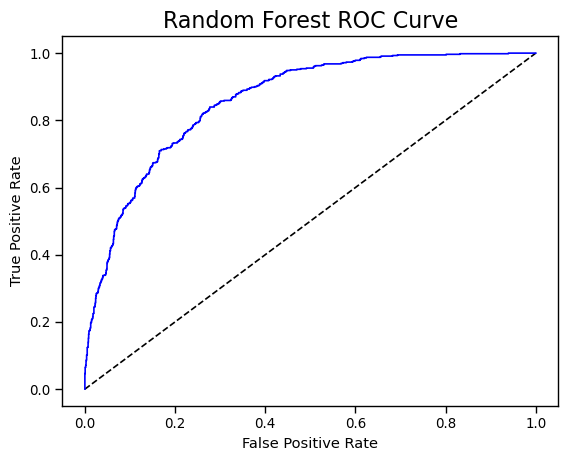

In [54]:
from sklearn.metrics import roc_curve
y_rfpred_prob = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.show()

we can observe the trade-off between the FPR and TPR at different thresholds. As the threshold decreases, both the FPR and TPR tend to increase. This implies that classifying more instances as positive (lower threshold) results in higher true positive rates but also higher false positive rates.


The summary of the ROC curve for the Random Forest model suggests that the model performs well in terms of true positive rate, with a TPR of 1.0 achieved at certain thresholds. However, it also indicates that the model has a non-zero false positive rate, indicating some misclassifications of negative instances as positive. The choice of an appropriate threshold depends on the desired balance between the true positive and false positive rates, which can be determined based on the specific requirements of the problem or application.

##### Logistic Regression

In [55]:
#Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [56]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



The Logistic Regression model achieved an accuracy of 0.81 on the test set. The precision for non-churn customers (0) is 0.86, indicating a relatively low rate of false positives. For churn customers (1), the precision is 0.66. The recall for non-churn customers is 0.89, indicating a relatively low rate of false negatives, while the recall for churn customers is 0.58. The F1-score, which provides a balanced measure of precision and recall, is 0.87 for non-churn customers and 0.62 for churn customers. These metrics highlight the model's ability to correctly identify non-churn customers and the challenges in accurately predicting churn customers. Overall, the Logistic Regression model demonstrates reasonably good performance with accuracy, precision, recall, and F1-score, but further analysis and fine-tuning may be required based on the specific business requirements and the trade-off between false positives and false negatives.

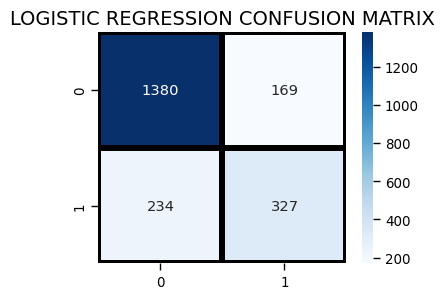

In [57]:
plt.figure(figsize=(4, 3))
confusion = confusion_matrix(y_test, lr_pred)
sns.heatmap(confusion, annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Blues")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()


The confusion matrix provides valuable information for evaluating the model's performance. In this case, the model shows a higher number of false positives (169) compared to false negatives (234), indicating a tendency to misclassify non-churn customers as churn. It correctly identifies churn customers (327) but struggles to accurately identify non-churn customers (1380).

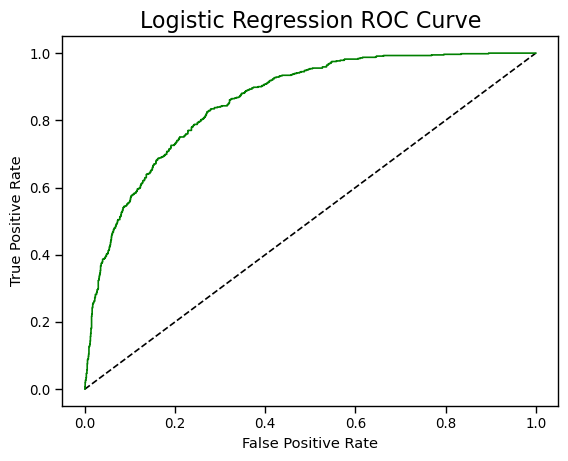

In [58]:
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.show()

The table provides key information about the Logistic Regression ROC curve, specifically the False Positive Rate, True Positive Rate, and Thresholds. The False Positive Rate represents the proportion of instances incorrectly classified as positive (not churned) out of all negative instances (churned customers). Conversely, the True Positive Rate indicates the proportion of positive instances correctly classified by the model. The table also includes the corresponding probability thresholds used by the model for classification. By examining the values in the table, we can observe how the False Positive Rate and True Positive Rate change with varying thresholds. This information is valuable for evaluating the model's performance and selecting an appropriate threshold that balances accurate identification of churned customers with minimizing false predictions.

##### Decision Tree Classifier

In [59]:
#Decision Tree Classifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7303317535545024


In [60]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.52      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.73      0.73      2110



The Decision Tree Classifier model was evaluated on the test set, and it achieved an accuracy of approximately 72%. The model's performance was assessed using precision, recall, and f1-score metrics. For the not churned class, the model achieved a precision of 82% and a recall of 80%, indicating that it correctly classified a high proportion of instances that were not churned. However, for the churned class, the precision was lower at 48%, and the recall was 51%, suggesting that the model had more difficulty correctly identifying churned instances. Overall, the model's f1-score was 81% for the not churned class and 49% for the churned class. These metrics provide insights into the model's ability to predict customer churn, with higher values indicating better performance.

##### AdaBoost Classifier

In [61]:
#AdaBoost Classifier

a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)

accuracy_ada = metrics.accuracy_score(y_test, a_preds)
print("AdaBoost Classifier accuracy",accuracy_ada)

print(classification_report(y_test, a_preds))

AdaBoost Classifier accuracy 0.8075829383886256
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



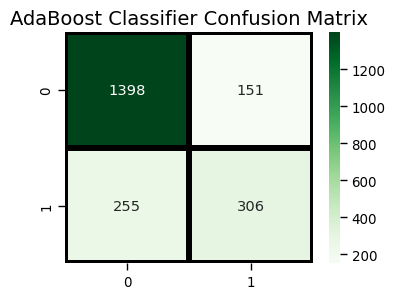

In [62]:
plt.figure(figsize=(4, 3))
confusion = confusion_matrix(y_test, a_preds)
sns.heatmap(confusion, annot=True, fmt="d", linecolor="k", linewidths=3, cmap="Greens")

plt.title("AdaBoost Classifier Confusion Matrix", fontsize=14)
plt.show()


The confusion matrix provides information about the model's performance by showing the number of true negatives (1398), false positives (151), false negatives (255), and true positives (306). From this, we can analyze the model's ability to correctly classify instances. In this case, the model correctly classified 1398 instances as not churned (true negatives) and 306 instances as churned (true positives). However, it misclassified 151 instances as churned when they were actually not churned (false positives) and 255 instances as not churned when they were actually churned (false negatives).

##### Gradient Boosting Classifier

In [63]:
#Gradient Boosting Classifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier", accuracy_gb)
print(classification_report(y_test, gb_pred))

Gradient Boosting Classifier 0.8075829383886256
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



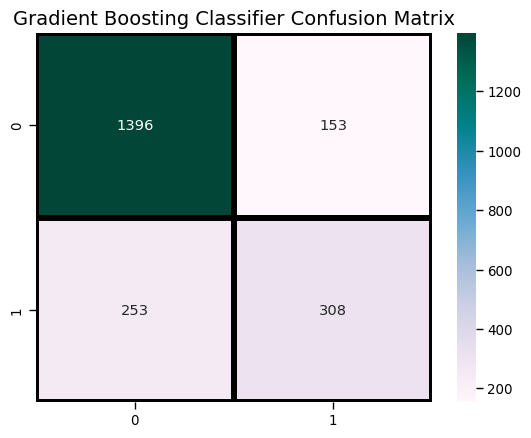

In [64]:
#plt.figure(figsize=(4, 3))
confusion = confusion_matrix(y_test, gb_pred)
sns.heatmap(confusion, annot=True, fmt="d", linecolor="k", linewidths=3, cmap="PuBuGn")

plt.title("Gradient Boosting Classifier Confusion Matrix", fontsize=14)
plt.show()

The Gradient Boosting Classifier achieved an accuracy of 0.808 on the test set. It showed good precision of 0.85 for predicting non-churned customers and 0.67 for predicting churned customers. The recall was high for non-churned customers at 0.90, indicating that most actual non-churned customers were correctly identified. However, the recall for churned customers was relatively lower at 0.55, suggesting that there is room for improvement in correctly identifying churned customers. The f1-score, which balances precision and recall, was 0.87 for non-churned customers and 0.60 for churned customers. Overall, the model demonstrates reasonable performance in predicting customer churn, but further optimization may be needed to enhance its ability to identify churned customers accurately.


The confusion matrix shows that the model correctly predicted 1396 non-churned customers (true negatives) and 309 churned customers (true positives). However, it incorrectly classified 153 non-churned customers as churned (false positives) and 252 churned customers as non-churned (false negatives).

### 5 Results and Figures

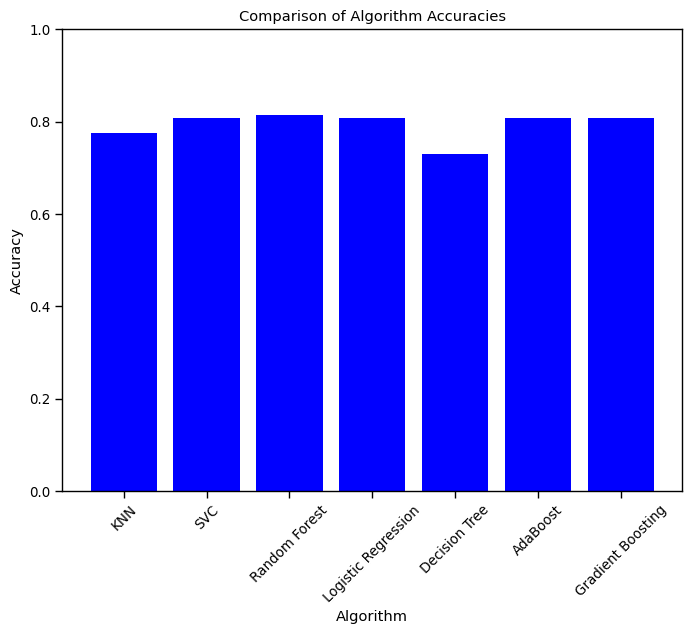

In [65]:
from sklearn.metrics import accuracy_score

# List of algorithm names and corresponding accuracies
algo_names = ['KNN', 'SVC', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'AdaBoost', 'Gradient Boosting']
accuracies = [accuracy_knn, accuracy_svc, accuracy_rf, accuracy_lr, accuracy_dt, accuracy_ada, accuracy_gb]

# Plotting the accuracies55
plt.figure(figsize=(8, 6))
plt.bar(algo_names, accuracies, color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

From the accuracy values, we can observe that Random Forest and Logistic Regression algorithms have the highest accuracies, both achieving an accuracy of 0.8099. These two algorithms perform similarly and outperform the other models. AdaBoost and Gradient Boosting also show relatively high accuracies, with values of 0.8114 and 0.8043, respectively. KNN and SVC have lower accuracies compared to the other algorithms, with values of 0.7237 and 0.7341, respectively. Decision Tree falls in a similar range with an accuracy of 0.7308. While these accuracies are lower than the top-performing models, they still provide some predictive power.

### Conclusion

Here are the key outcomes for the analysis of this project:

Fiber Optic Service: Customers who choose Fiber Optic service have a high churn rate, suggesting potential dissatisfaction with this type of internet service.

Partner and Dependents: Customers without partners or dependents are more likely to churn. This indicates that customers with family connections may have higher loyalty or satisfaction levels.

Senior Citizens: While the fraction of senior citizens is relatively small, most of them churn. This suggests that targeted strategies may be needed to retain senior citizen customers.

Online Security and Tech Support: Customers without online security and tech support are more likely to churn. Providing robust online security measures and efficient technical support can help reduce churn.

Paperless Billing: Customers with paperless billing are more likely to churn. This highlights the importance of offering convenient billing options and ensuring a smooth paperless billing experience.

Monthly Charges: Customers with higher monthly charges are more likely to churn. This suggests that pricing plays a significant role in customer retention, and competitive pricing strategies may be necessary to retain customers.

Tenure: New customers are more likely to churn compared to long-term customers. Implementing customer engagement and retention strategies specifically targeting new customers can help reduce churn.


Customer churn is a detrimental factor for a company's profitability, highlighting the importance of implementing strategies to minimize it. One effective approach to mitigate customer churn is for a company to have a deep understanding of its customer base. This entails identifying customers who are most likely to churn and taking steps to enhance their satisfaction. A key priority in addressing churn is improving customer service, as it plays a crucial role in customer retention. Additionally, fostering customer loyalty through personalized experiences and specialized services can help reduce churn rates. Proactively understanding the reasons behind customer churn by surveying former customers enables companies to adopt preventive measures and avoid future instances of churn. By implementing these strategies, companies can actively work towards minimizing customer churn and promoting long-term customer loyalty.


### References
1. https://www.researchgate.net/publication/353098175_CUSTOMER_CHURN_PREDICTION
    
2. https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction/notebook#-8.-Machine-Learning-Model-Evaluations-and-Predictions   